# Load data

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
# Load the California Housing dataset
california = fetch_california_housing()

# Creating a DataFrame for easier visualization
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Display the first 5 rows of the dataset
print("California Housing Dataset (first 5 rows):")
california_df

California Housing Dataset (first 5 rows):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# With all features

In [8]:
# Select the features (X) and target (y)
X = california_df.drop(columns=['PRICE'])
y = california_df['PRICE']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Coefficients and intercept of the linear equation
print("\nCoefficients of the linear equation:")
print(lr_model.coef_)
print("Intercept of the linear equation:")
print(lr_model.intercept_)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate and display the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on the test data: {mse}")


Coefficients of the linear equation:
[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept of the linear equation:
-37.023277706064064

Mean Squared Error on the test data: 0.555891598695244


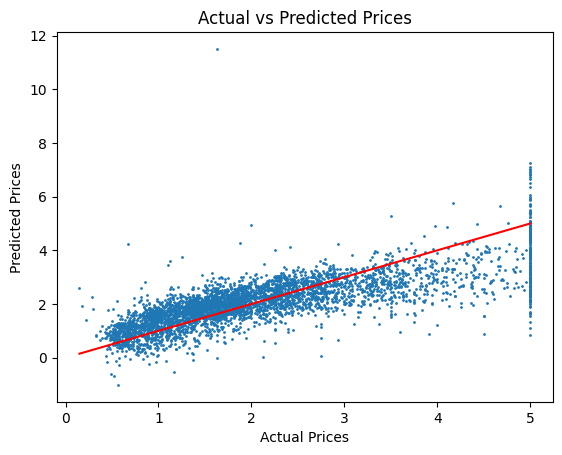

In [39]:
# Visualizing the relationship between Actual and Predicted Prices
plt.scatter(y_test, y_pred, s = 1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plot a 45-degree line
plt.show()

# With single features

In [40]:
# Select one feature for visualization (e.g., 'MedInc')
X_train_medinc = X_train[['MedInc']]  # Select only 'MedInc' column
X_test_medinc = X_test[['MedInc']]

# Fit the model using only 'MedInc' to demonstrate
lr_model_medinc = LinearRegression()
lr_model_medinc.fit(X_train_medinc, y_train)

LinearRegression()

In [41]:
# Coefficients and intercept of the linear equation
print("\nCoefficients of the linear equation:")
print(lr_model_medinc.coef_)
print("Intercept of the linear equation:")
print(lr_model_medinc.intercept_)


Coefficients of the linear equation:
[0.41933849]
Intercept of the linear equation:
0.44459729169078677


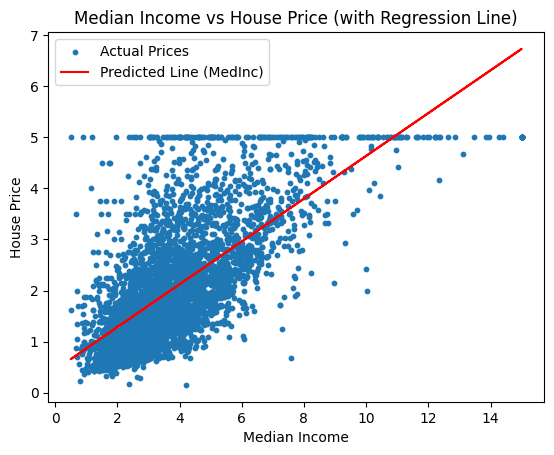

In [42]:
# Predict using the 'MedInc' feature
y_pred_medinc = lr_model_medinc.predict(X_test_medinc)

# Plotting actual data points for 'MedInc' vs 'Price'
plt.scatter(X_test_medinc, y_test, s=10, label="Actual Prices")

# Plot the predicted regression line
plt.plot(X_test_medinc, y_pred_medinc, color='red', label="Predicted Line (MedInc)")

# Label the plot
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Median Income vs House Price (with Regression Line)')
plt.legend()

# Show the plot
plt.show()

# Visualization of higher dimentional spaces

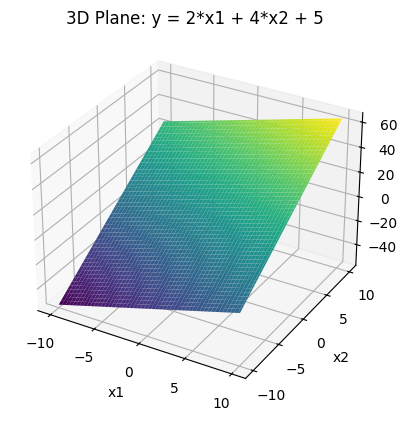

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x1 and x2 values
x1 = np.linspace(-10, 10, 100)  # Change range as needed
x2 = np.linspace(-10, 10, 100)  # Change range as needed
x1, x2 = np.meshgrid(x1, x2)

# Calculate y values based on the plane equation
y = 2 * x1 + 4 * x2 + 5

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x1, x2, y, cmap='viridis', edgecolor='none')

# Add labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Plane: y = 2*x1 + 4*x2 + 5')

# Show the plot
plt.show()
